In [1]:
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from dbscan_display import read_results,typenames,nametypes

/home/price-jones/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
print(typenames)

{'spec': 'spectra', 'abun': 'abundances', 'reda': 'reduced abundances', 'toph': 'tophat windows', 'wind': 'windows', 'prin': '10 principal components', 'prin2': '02 principal components', 'prin5': '05 principal components', 'prin10': '10 principal components', 'prin20': '20 principal components', 'prin30': '30 principal components', 'prin50': '50 principal components', 'tabn': 'ting abundances', 'trda': 'reduced ting abundances', 'labn': 'leung abundances', 'lrda': 'reduced leung abundances'}


In [4]:
d = read_results(datatype = 'spec', case = 12, 
                 timestamp = '2018-08-14.20.35.09.910397')

In [5]:
import matplotlib

In [6]:
colors={'spec':'#5E3023',
        'toph':'#FCA17D',
        'prin30':'#C08552',
        'abun':'#895737',
        'tabn':'#EE6352',
        'reda':'b',
        'trda':'m'}

shapes={'spec':'v',
        'toph':'s',
        'prin30':'o',
        'abun':'p',
        'tabn':'^',
        'reda':'o',
        'trda':'o'}

sizes={'spec':20,
        'toph':20,
        'prin30':20,
        'abun':20,
        'tabn':20,
        'reda':20,
        'trda':20}

alphas={'spec':0.7,
        'toph':0.7,
        'prin30':0.7,
        'abun':0.7,
        'tabn':0.7}

names={'spec':'spectra',
       'toph':'binary mask',
       'prin30':'principal components',
       'abun':'abundances\n(Holtzman et. al. 2015)',
       'tabn':'abundances\n(Ting et. al. 2016)'}

### For only epsilon variation

In [9]:
d.read_base_data()
if not d.allbad:
    d.generate_average_stats(testnum=10,testsize=25,testeff=0.7,testcom=0.7,iters=100,minmem=15)

spectra
abundances
reduced abundances
tophat windows
windows
10 principal components
02 principal components
05 principal components
20 principal components
30 principal components
50 principal components
ting abundances
reduced ting abundances
leung abundances
reduced leung abundances


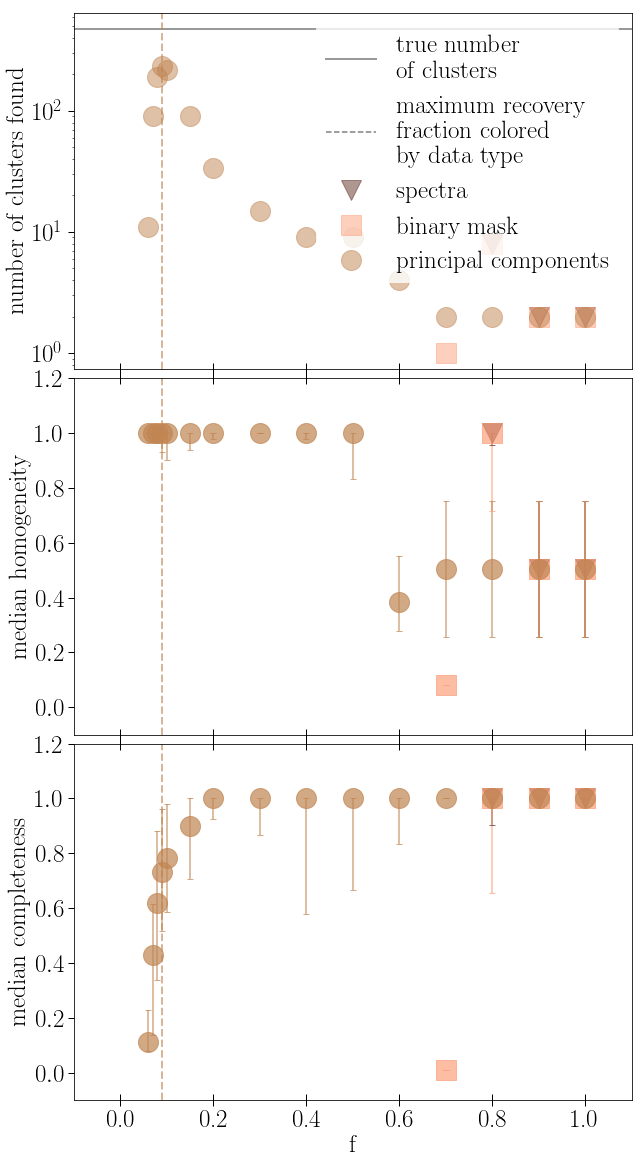

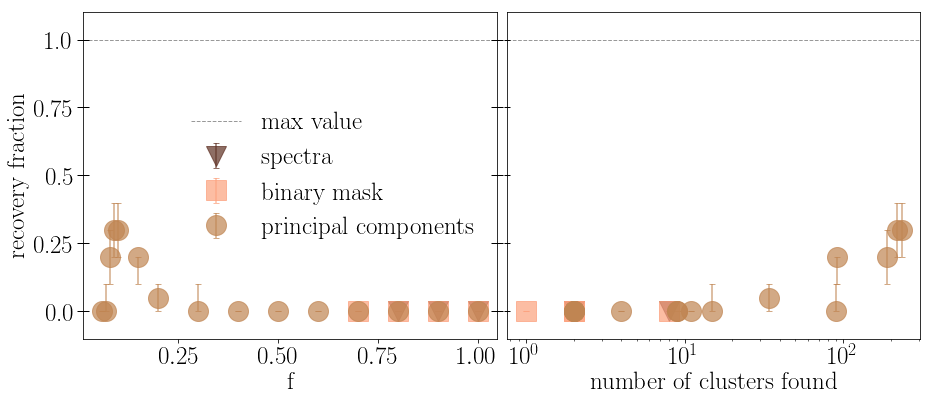

In [14]:
keys = list(typenames.keys())
keys = ['spec','toph','prin30']
for key in keys:
    if '{0}_statsource'.format(key) in dir(d):
        ss = getattr(d,'{0}_statsource'.format(key))
        ss = ss.data
        if any(ss['numc'] > 0.5):
            params = ss['params']
            mask = ss['numc'] > 0.5
            eps = np.array([float(i.split(', ')[0]) for i in params])
            font = {'family': 'serif',
                    'weight': 'normal',
                    'size'  :  25 # Tune this according to personal preference
                    }
            maxrecv = np.where(ss['fstd'][:,1][mask]==np.max(ss['fstd'][:,1][mask]))
            matplotlib.rc('font',**font)
            plt.rc('text', usetex=True)
#             plt.figure(2,figsize=(10,8))
#             ax = plt.subplot(111)
#             ax.set_yscale("log")
#             if key == keys[0]:
#                 plt.axhline(ss['tnumc'][0],color='k',lw=2,alpha=0.4,label='true number of clusters')
#             plt.errorbar(eps[mask],ss['numc'][mask],label='{0}'.format(names[key]),alpha=0.5,color=colors[key],markersize=2*sizes[key],marker=shapes[key],ls='None')
#             plt.xlabel('$\epsilon$',fontsize=30)
#             plt.ylabel('number of clusters found')
#             legend = plt.legend(loc='best')
#             legend.get_frame().set_linewidth(0.0)
            font = {'family': 'serif',
                    'weight': 'normal',
                    'size'  :  25 # Tune this according to personal preference
                    }
            matplotlib.rc('font',**font)
            plt.rc('text', usetex=True)
            plt.figure(1,figsize=(10,20))
            ax = plt.subplot(311)
            ax.set_yscale("log")
            if key == keys[0]:
                plt.axhline(ss['tnumc'][0],color='k',lw=2,alpha=0.4,label='true number\nof clusters')
                plt.axvline(-1,color='k',alpha=0.5,label='maximum recovery\nfraction colored\nby data type',ls='--')
            if np.max(ss['fstd'][:,1][mask]) > 0:
                plt.axvline(eps[mask][maxrecv[0][0]],color=colors[key],ls='--',alpha=0.6,lw=2)
            plt.errorbar(eps[mask],ss['numc'][mask],label='{0}'.format(names[key]),alpha=0.5,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
            #plt.xlabel('$\epsilon$',fontsize=30)
            plt.ylabel('number of clusters found')
            fticks = np.round(np.arange(0,1.2,0.2),1)
            plt.xticks(fticks,['']*len(fticks))
            plt.tick_params(axis='x',direction='inout',length=12,width=1,bottom=True,top=False)
            plt.tick_params(axis='y',direction='out',length=6,width=1)
            plt.xlim(-0.1,1.1)
            legend = plt.legend(loc='best')
            legend.get_frame().set_linewidth(0.0)
            plt.subplot(312)
            plt.ylabel('median homogeneity')
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
            if np.max(ss['fstd'][:,1][mask]) > 0:
                plt.axvline(eps[mask][maxrecv[0][0]],color=colors[key],ls='--',alpha=0.6,lw=2)
            plt.errorbar(eps[mask],ss['stdeff'][:,1][mask],yerr=[ss['stdeff'][:,1][mask]-ss['stdeff'][:,0][mask],ss['stdeff'][:,2][mask]-ss['stdeff'][:,1][mask]],capsize=3,alpha=alphas[key],color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
            #legend = plt.legend(loc='best')
            #legend.get_frame().set_linewidth(0.0)
            plt.ylim(-0.1,1.2)
            plt.xlim(-0.1,1.1)
            plt.xticks(fticks,['']*len(fticks))
            plt.tick_params(axis='x',direction='inout',length=12,width=1,bottom=True,top=True)
            plt.tick_params(axis='y',direction='out',length=6,width=1)
#             ax = plt.subplot(422)
#             ax.set_xscale("log")
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--')
#             plt.errorbar(ss['numc'][mask],ss['stdeff'][:,1][mask],yerr=[ss['stdeff'][:,1][mask]-ss['stdeff'][:,0][mask],ss['stdeff'][:,2][mask]-ss['stdeff'][:,1][mask]],label='{0}'.format(names[key]),alpha=alphas[key],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
#             legend = plt.legend(loc='best')
#             legend.get_frame().set_linewidth(0.0)
#             plt.ylim(-0.1,1.2)
            plt.subplot(313)
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
            if np.max(ss['fstd'][:,1][mask]) > 0:
                plt.axvline(eps[mask][maxrecv[0][0]],color=colors[key],ls='--',alpha=0.6,lw=2)
            plt.ylabel('median completeness')
            plt.errorbar(eps[mask],ss['stdcom'][:,1][mask],yerr=[ss['stdcom'][:,1][mask]-ss['stdcom'][:,0][mask],ss['stdcom'][:,2][mask]-ss['stdcom'][:,1][mask]],capsize=3,label='{0}'.format(names[key]),alpha=alphas[key],color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
            plt.ylim(-0.1,1.2)
            plt.xlim(-0.1,1.1)
            plt.xlabel('f')
            plt.xticks(fticks,fticks)
            plt.tick_params(axis='x',direction='inout',length=12,width=1,bottom=True,top=True)
            plt.tick_params(axis='y',direction='out',length=6,width=1)
#             ax = plt.subplot(424)
#             ax.set_xscale("log")
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
#             plt.errorbar(ss['numc'][mask],ss['stdcom'][:,1][mask],alpha=alphas[key],yerr=[ss['stdcom'][:,1][mask]-ss['stdcom'][:,0][mask],ss['stdcom'][:,2][mask]-ss['stdcom'][:,1][mask]],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
#             plt.ylim(-0.1,1.2)
#             plt.subplot(425)
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
#             plt.ylabel('silhouette coefficient')
#             plt.errorbar(eps[mask],ss['stdfsi'][:,1][mask],label='{0}'.format(typenames[key]),yerr=[ss['stdfsi'][:,1][mask]-ss['stdfsi'][:,0][mask],ss['stdfsi'][:,2][mask]-ss['stdfsi'][:,1][mask]],capsize=3,alpha=alphas[key],color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
#             plt.ylim(-1.1,1.2)
#             ax = plt.subplot(426)
#             ax.set_xscale("log")
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
#             plt.errorbar(ss['numc'][mask],ss['stdfsi'][:,1][mask],alpha=alphas[key],yerr=[ss['stdfsi'][:,1][mask]-ss['stdfsi'][:,0][mask],ss['stdfsi'][:,2][mask]-ss['stdfsi'][:,1][mask]],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
#             plt.ylim(-1.1,1.2)
            plt.subplots_adjust(hspace=0.025)
            plt.figure(2,figsize=(15,6))
            plt.subplot(121)
            plt.ylabel('recovery fraction')
            plt.xlabel('f')
            if key ==keys[0]:
                plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
            plt.errorbar(eps[mask],ss['fstd'][:,1][mask],yerr=[ss['fstd'][:,1][mask]-ss['fstd'][:,0][mask],ss['fstd'][:,2][mask]-ss['fstd'][:,1][mask]],alpha=alphas[key],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None',label='{0}'.format(names[key]))
            plt.ylim(-0.1,1.1)
            rticks = np.arange(0,1.25,0.25)
            plt.tick_params(axis='y',direction='inout',length=12,width=1,left=True,right=True)
            plt.yticks(rticks,rticks)
            legend = plt.legend(loc='best')
            legend.get_frame().set_linewidth(0.0)
            ax = plt.subplot(122)
            ax.set_xscale("log")
            if key ==keys[0]:
                plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
            plt.errorbar(ss['numc'][mask],ss['fstd'][:,1][mask],yerr=[ss['fstd'][:,1][mask]-ss['fstd'][:,0][mask],ss['fstd'][:,2][mask]-ss['fstd'][:,1][mask]],alpha=alphas[key],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
            plt.tick_params(axis='y',direction='inout',length=6,width=1,left=True,right=False)
            plt.yticks(rticks,['']*len(rticks))
            plt.ylim(-0.1,1.1)
            plt.xlabel('number of clusters found')
            plt.subplots_adjust(wspace=0.025)
plt.figure(2)
plt.savefig('recv_spec_5e4.pdf')
plt.figure(1)
plt.savefig('stats_spec_5e4.pdf')
            

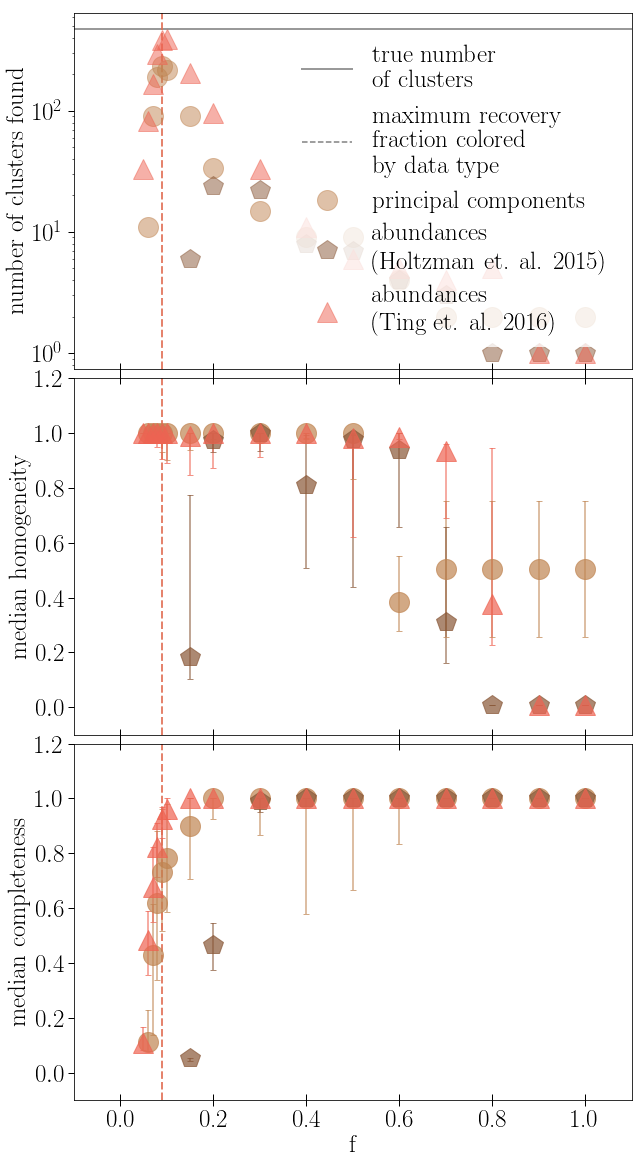

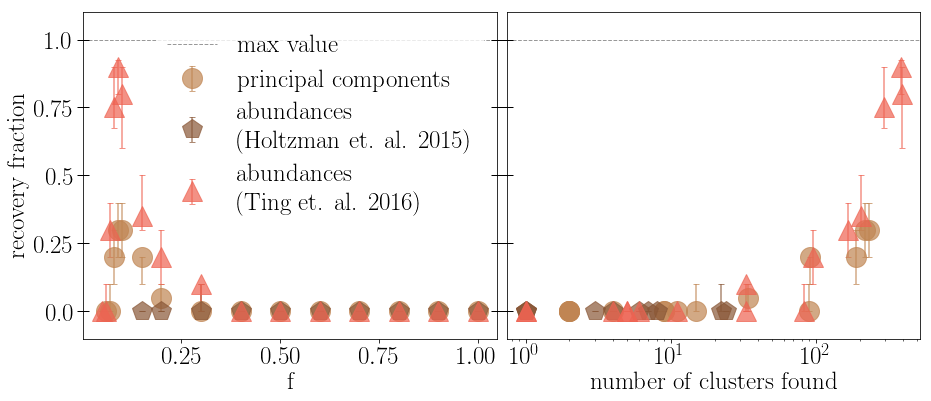

In [17]:
keys = list(typenames.keys())
keys = ['prin30','abun','tabn']#,'reda','trda']
for key in keys:
    if '{0}_statsource'.format(key) in dir(d):
        ss = getattr(d,'{0}_statsource'.format(key))
        ss = ss.data
        if any(ss['numc'] > 0.5):
            params = ss['params']
            mask = ss['numc'] > 0.5
            eps = np.array([float(i.split(', ')[0]) for i in params])
            font = {'family': 'serif',
                    'weight': 'normal',
                    'size'  :  25 # Tune this according to personal preference
                    }
            maxrecv = np.where(ss['fstd'][:,1][mask]==np.max(ss['fstd'][:,1][mask]))
            matplotlib.rc('font',**font)
            plt.rc('text', usetex=True)
#             plt.figure(2,figsize=(10,8))
#             ax = plt.subplot(111)
#             ax.set_yscale("log")
#             if key == keys[0]:
#                 plt.axhline(ss['tnumc'][0],color='k',lw=2,alpha=0.4,label='true number of clusters')
#             plt.errorbar(eps[mask],ss['numc'][mask],label='{0}'.format(names[key]),alpha=0.5,color=colors[key],markersize=2*sizes[key],marker=shapes[key],ls='None')
#             plt.xlabel('$\epsilon$',fontsize=30)
#             plt.ylabel('number of clusters found')
#             legend = plt.legend(loc='best')
#             legend.get_frame().set_linewidth(0.0)
            font = {'family': 'serif',
                    'weight': 'normal',
                    'size'  :  25 # Tune this according to personal preference
                    }
            matplotlib.rc('font',**font)
            plt.rc('text', usetex=True)
            plt.figure(1,figsize=(10,20))
            ax = plt.subplot(311)
            ax.set_yscale("log")
            if key == keys[0]:
                plt.axhline(ss['tnumc'][0],color='k',lw=2,alpha=0.4,label='true number\nof clusters')
                plt.axvline(-1,color='k',alpha=0.5,label='maximum recovery\nfraction colored\nby data type',ls='--')
            if np.max(ss['fstd'][:,1][mask]) > 0:
                plt.axvline(eps[mask][maxrecv[0][0]],color=colors[key],ls='--',alpha=0.6,lw=2)
            plt.errorbar(eps[mask],ss['numc'][mask],label='{0}'.format(names[key]),alpha=0.5,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
            #plt.xlabel('$\epsilon$',fontsize=30)
            plt.ylabel('number of clusters found')
            fticks = np.round(np.arange(0,1.2,0.2),1)
            plt.xticks(fticks,['']*len(fticks))
            plt.tick_params(axis='x',direction='inout',length=12,width=1,bottom=True,top=False)
            plt.tick_params(axis='y',direction='out',length=6,width=1)
            plt.xlim(-0.1,1.1)
            legend = plt.legend(loc='best')
            legend.get_frame().set_linewidth(0.0)
            plt.subplot(312)
            plt.ylabel('median homogeneity')
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
            if np.max(ss['fstd'][:,1][mask]) > 0:
                plt.axvline(eps[mask][maxrecv[0][0]],color=colors[key],ls='--',alpha=0.6,lw=2)
            plt.errorbar(eps[mask],ss['stdeff'][:,1][mask],yerr=[ss['stdeff'][:,1][mask]-ss['stdeff'][:,0][mask],ss['stdeff'][:,2][mask]-ss['stdeff'][:,1][mask]],capsize=3,alpha=alphas[key],color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
            #legend = plt.legend(loc='best')
            #legend.get_frame().set_linewidth(0.0)
            plt.ylim(-0.1,1.2)
            plt.xlim(-0.1,1.1)
            plt.xticks(fticks,['']*len(fticks))
            plt.tick_params(axis='x',direction='inout',length=12,width=1,bottom=True,top=True)
            plt.tick_params(axis='y',direction='out',length=6,width=1)
#             ax = plt.subplot(422)
#             ax.set_xscale("log")
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--')
#             plt.errorbar(ss['numc'][mask],ss['stdeff'][:,1][mask],yerr=[ss['stdeff'][:,1][mask]-ss['stdeff'][:,0][mask],ss['stdeff'][:,2][mask]-ss['stdeff'][:,1][mask]],label='{0}'.format(names[key]),alpha=alphas[key],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
#             legend = plt.legend(loc='best')
#             legend.get_frame().set_linewidth(0.0)
#             plt.ylim(-0.1,1.2)
            plt.subplot(313)
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
            if np.max(ss['fstd'][:,1][mask]) > 0:
                plt.axvline(eps[mask][maxrecv[0][0]],color=colors[key],ls='--',alpha=0.6,lw=2)
            plt.ylabel('median completeness')
            plt.errorbar(eps[mask],ss['stdcom'][:,1][mask],yerr=[ss['stdcom'][:,1][mask]-ss['stdcom'][:,0][mask],ss['stdcom'][:,2][mask]-ss['stdcom'][:,1][mask]],capsize=3,label='{0}'.format(names[key]),alpha=alphas[key],color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
            plt.ylim(-0.1,1.2)
            plt.xlim(-0.1,1.1)
            plt.xlabel('f')
            plt.xticks(fticks,fticks)
            plt.tick_params(axis='x',direction='inout',length=12,width=1,bottom=True,top=True)
            plt.tick_params(axis='y',direction='out',length=6,width=1)
#             ax = plt.subplot(424)
#             ax.set_xscale("log")
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
#             plt.errorbar(ss['numc'][mask],ss['stdcom'][:,1][mask],alpha=alphas[key],yerr=[ss['stdcom'][:,1][mask]-ss['stdcom'][:,0][mask],ss['stdcom'][:,2][mask]-ss['stdcom'][:,1][mask]],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
#             plt.ylim(-0.1,1.2)
#             plt.subplot(425)
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
#             plt.ylabel('silhouette coefficient')
#             plt.errorbar(eps[mask],ss['stdfsi'][:,1][mask],label='{0}'.format(typenames[key]),yerr=[ss['stdfsi'][:,1][mask]-ss['stdfsi'][:,0][mask],ss['stdfsi'][:,2][mask]-ss['stdfsi'][:,1][mask]],capsize=3,alpha=alphas[key],color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
#             plt.ylim(-1.1,1.2)
#             ax = plt.subplot(426)
#             ax.set_xscale("log")
#             if key ==keys[0]:
#                 plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
#             plt.errorbar(ss['numc'][mask],ss['stdfsi'][:,1][mask],alpha=alphas[key],yerr=[ss['stdfsi'][:,1][mask]-ss['stdfsi'][:,0][mask],ss['stdfsi'][:,2][mask]-ss['stdfsi'][:,1][mask]],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
#             plt.ylim(-1.1,1.2)
            plt.subplots_adjust(hspace=0.025)
            plt.figure(2,figsize=(15,6))
            plt.subplot(121)
            plt.ylabel('recovery fraction')
            plt.xlabel('f')
            if key ==keys[0]:
                plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
            plt.errorbar(eps[mask],ss['fstd'][:,1][mask],yerr=[ss['fstd'][:,1][mask]-ss['fstd'][:,0][mask],ss['fstd'][:,2][mask]-ss['fstd'][:,1][mask]],alpha=alphas[key],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None',label='{0}'.format(names[key]))
            plt.ylim(-0.1,1.1)
            rticks = np.arange(0,1.25,0.25)
            plt.tick_params(axis='y',direction='inout',length=12,width=1,left=True,right=True)
            plt.yticks(rticks,rticks)
            legend = plt.legend(loc='best')
            legend.get_frame().set_linewidth(0.0)
            ax = plt.subplot(122)
            ax.set_xscale("log")
            if key ==keys[0]:
                plt.axhline(1,color='k',lw=1,alpha=0.4,ls='--',label='max value')
            plt.errorbar(ss['numc'][mask],ss['fstd'][:,1][mask],yerr=[ss['fstd'][:,1][mask]-ss['fstd'][:,0][mask],ss['fstd'][:,2][mask]-ss['fstd'][:,1][mask]],alpha=alphas[key],capsize=3,color=colors[key],markersize=sizes[key],marker=shapes[key],ls='None')
            plt.tick_params(axis='y',direction='inout',length=12,width=1,left=True,right=False)
            plt.yticks(rticks,['']*len(rticks))
            plt.ylim(-0.1,1.1)
            plt.xlabel('number of clusters found')
            plt.subplots_adjust(wspace=0.025)
plt.figure(2)
plt.savefig('recv_abun_5e4.pdf')
plt.figure(1)
plt.savefig('stats_abun_5e4.pdf')

In [51]:
import h5py

In [55]:
c = h5py.File('../PC12.hdf5','r')
names = ['vec2','vec5','vec10','vec20','vec50','vec1000','vec7214']

In [56]:
explained = 0.9
varatio = c['vec7214'].attrs['varratio']
a = np.where(np.cumsum(varatio)>explained)[0][0]
print('you need {0} PCs to exceed {1}% explained variance'.format(a+1,explained*100))

you need 2298 PCs to exceed 90.0% explained variance


In [57]:
vecs = 30
print('if you have {0} PCs, you can explain {1}% of the variance'.format(vecs,np.cumsum(varatio)[vecs-1]))

if you have 30 PCs, you can explain 0.7092947908025158% of the variance


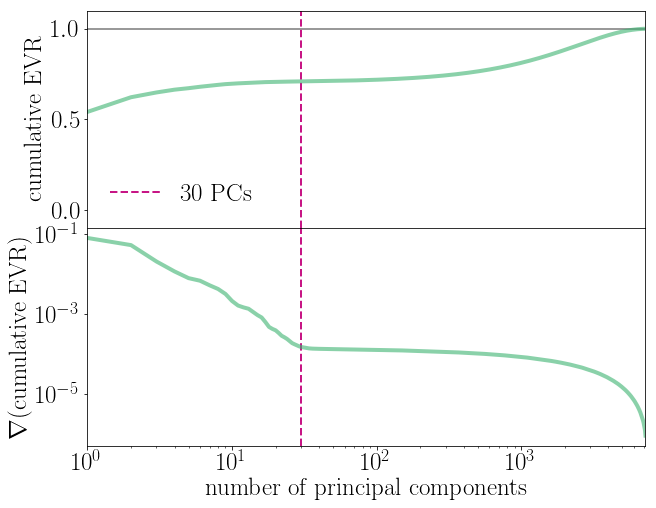

In [81]:
font = {'family': 'serif',
        'weight': 'normal',
        'size'  :  25 # Tune this according to personal preference
        }
matplotlib.rc('font',**font)
plt.rc('text', usetex=True)
mark = 30
for n,name in enumerate(names):
    eigvecs = c[name]
    eigvals = c[name].attrs['eigvals']
    varatio = c[name].attrs['varratio']
    plt.figure(1,figsize=(10,8))
    plt.subplot(211)
    if n == len(names)-1:
        plt.axhline(1,color='k',ls='-',lw=2,alpha=0.4)
        plt.axvline(mark,color='mediumvioletred',ls='--',lw=2,label='{0} PCs'.format(mark))
        plt.semilogx(np.arange(1,len(varatio)+1,1),np.cumsum(varatio),lw=4,color='mediumseagreen',alpha=0.6)
        plt.ylim(-0.1,1.1)
        plt.xlim(0,7214)
        plt.xticks([])
        #plt.xlabel('number of principal components')
        plt.ylabel('cumulative EVR')
        legend = plt.legend(loc='best')
        legend.get_frame().set_linewidth(0.0)
    plt.subplot(212) 
    if n == len(names)-1:
        plt.axvline(mark,color='mediumvioletred',ls='--',lw=2)
        plt.loglog(np.arange(1,len(varatio)+1,1),np.gradient(np.cumsum(varatio)),lw=4,color='mediumseagreen',alpha=0.6)
        plt.xlabel('number of principal components')
        plt.ylabel(r'$\nabla$(cumulative EVR)')
        plt.xlim(0,7214)
    plt.subplots_adjust(hspace=0.0)
plt.figure(1)
plt.savefig('principal_components.pdf')

In [53]:
rawdata = h5py.File('/home/price-jones/TAGSPACE/synthetic_clusters/centergen_choosestruct/clustering_data.hdf5')

In [104]:
stamp = '2018-08-22.04.01.21.877459'
centers = rawdata['center_abundances_{0}'.format(stamp)]
d = read_results(datatype = 'spec', case = 12, 
                 timestamp = stamp)
d.read_base_data()

In [155]:
elems = (centers.attrs['elemnames']).astype('U2')
feind = np.where(elems=='Fe')[0][0]

In [169]:
fecenters = np.zeros(centers.shape)
fecenters[:,0] = centers[:,feind]
els = np.delete(elems,feind)
for col in range(len(els)):
    match = np.where(elems==els[col])[0][0]
    fecenters[:,col+1] = centers[:,match]
    fecenters[:,col+1] -= centers[:,feind]

In [142]:
from matplotlib.colors import LogNorm
default_cmap='viridis'
fs = 12
import matplotlib
font = {'family': 'serif',
        'weight': 'normal',
        'size'  :  fs
}

matplotlib.rc('font',**font)
def histogram2d(fig,ax,x,y,bins=100,clabel=False,vmin=0,vmax=110,norm='lin',default_cmap=default_cmap):
    """
    Create a 2D histogram of data represented by the two dimensions x and y
    
    fig:      Figure to plot in
    ax:       Subplot object to plot in
    x:        Array of data values in 'x'
    y:        Array of data values in 'y'
    bins:     Number of bins in which to divide each axis
    clabel:   Label for the colourbar - no colourbar is plotted if this is not given
    vmin:     Minimum value of the histogram
    vmax:     Maximum value of the histogram
    
    """
    # Create histogram
    H,xedges,yedges = np.histogram2d(x,y,bins=bins)
    # Reorient appropriately
    H = np.rot90(H)
    H = np.flipud(H)
    # Mask where bins are empty
    Hmasked = np.ma.masked_where(H==0,H)
    # Plot histogram
    if norm == 'lin':
        im = ax.pcolormesh(xedges,yedges,Hmasked,
                           cmap = plt.get_cmap(default_cmap),
                           vmin=vmin,vmax=vmax)
    elif norm == 'log':
            im = ax.pcolormesh(xedges,yedges,Hmasked,
                           cmap = plt.get_cmap(default_cmap),
                           norm=LogNorm(vmin=vmin,vmax=vmax))
    # If colourbar is desired, plot and label it
    if clabel:
        cbar=fig.colorbar(im,pad = 0)
        cbar.set_label(label=clabel,fontsize=fs)
        cbar.ax.tick_params(labelsize=fs)
    elif not clabel:
        cbar=fig.colorbar(im,pad = 0)
        cbar.ax.tick_params(labelsize=fs)

In [ ]:
plt.figure(figsize=(10,8))
for elem in range(fecenters.shape[1]):
    plt.subplot(3,5,elem+1)
    plt.hist(fecenters[:,elem],bins=elembins,alpha=0.1,edgecolor='k',color='k',normed=True)
    plt.hist(fecenters[good][:,elem],bins=elembins,histtype='step',alpha=0.7,edgecolor='c',color='c',normed=True,lw=3)
    plt.hist(fecenters[matchtlabs][bad][:,elem],bins=elembins,histtype='step',alpha=0.7,edgecolor='r',color='r',normed=True,lw=3)
    plt.xlabel(labels[elem])
plt.tight_layout()

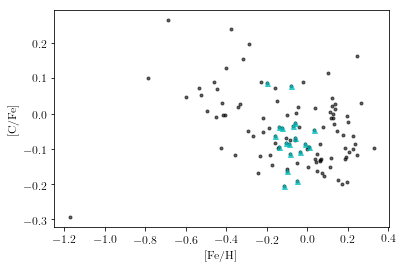

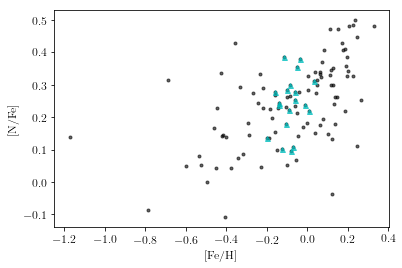

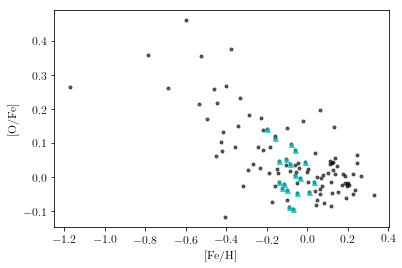

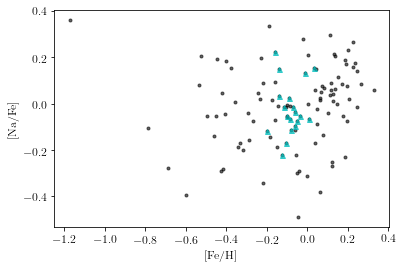

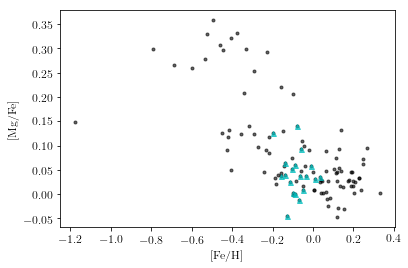

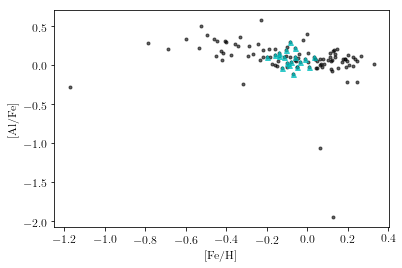

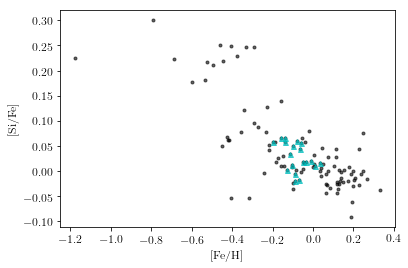

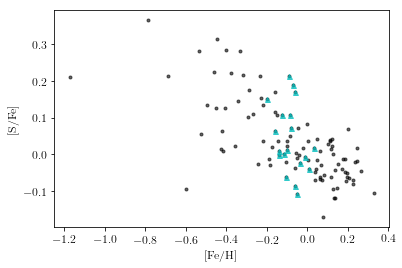

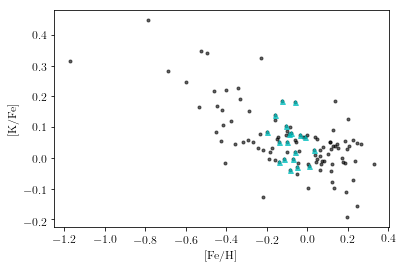

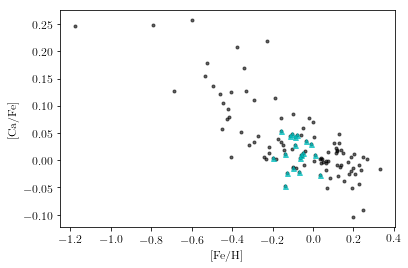

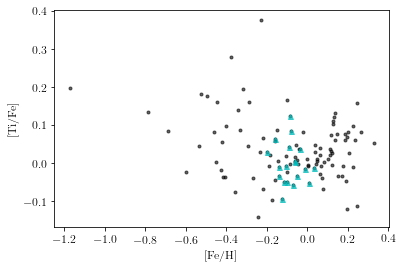

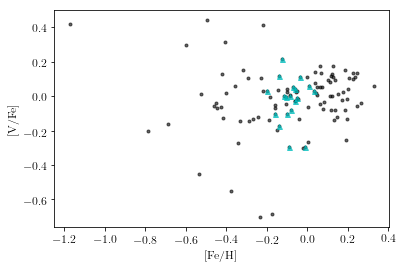

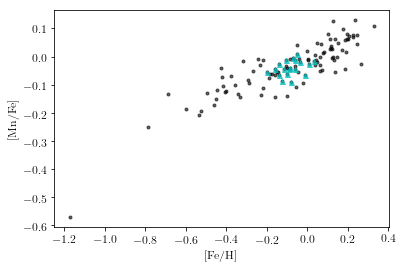

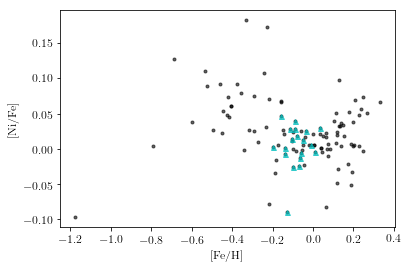

In [195]:
ndim = 15
ecut = 0.8
ccut = 0.8
sizemin = 15
nbins = 20
mask = d.tsize>sizemin
#mask= [True]*len(fes)

for elem in elems:
    if elem != 'Fe':
        mgind = np.where(elems==elem)[0][0]
        fes = (centers[:,feind])
        mgs = (centers[:,mgind]-centers[:,feind])
        fig = plt.figure()
        ax = plt.subplot(111)
        if len(fes[mask])<200:
            plt.plot(fes[mask],mgs[mask],'.',color='k',alpha=0.6)
        elif len(fes[mask])>200:
            histogram2d(fig,ax,fes[mask],mgs[mask],norm='log',bins=50,vmin=1,vmax=50,default_cmap='gray')
        d.read_run_data(eps=0.1,min_sample=2,update=True,datatype='prin30')
        success=(d.eff>ecut)*(d.com>ccut)*(d.fsize>sizemin)
        labs = d.matchtlabs[success]
        plt.plot(fes[labs],mgs[labs],'^',color='c',alpha=0.7,markersize=5)
        plt.xlabel('[Fe/H]')
        plt.ylabel('[{0}/Fe]'.format(elem))

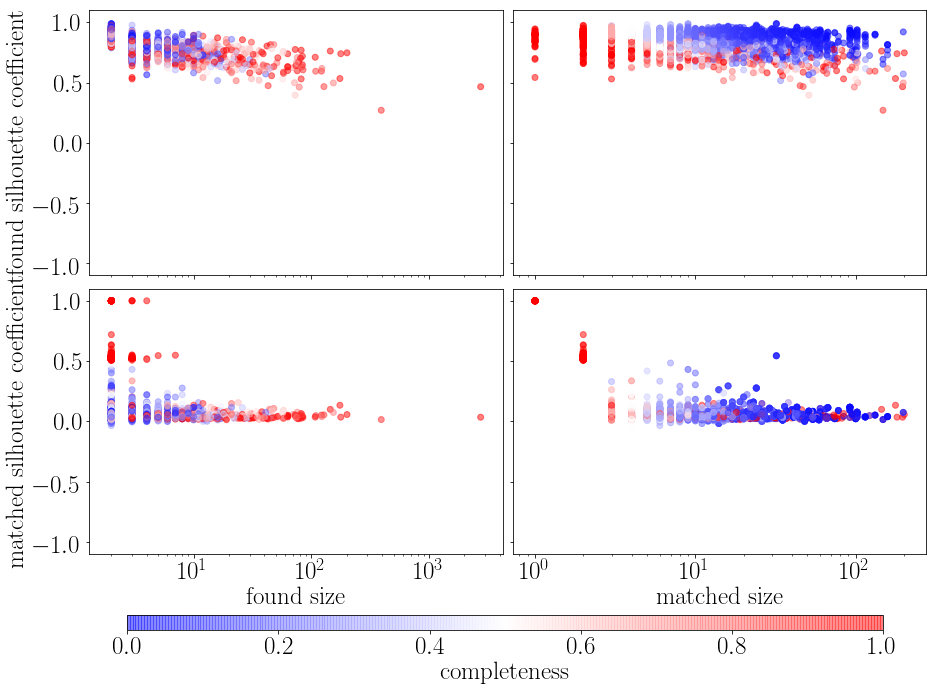

In [61]:
d.read_run_data(eps=0.1,min_sample=2,update=True,datatype='prin30')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row',figsize=(15,10))
ax1.set_xscale('log')
sc = ax1.scatter(d.fsize,d.fsil,c=d.com,cmap='bwr',vmin=0,vmax=1,alpha=0.5)
ax1.set_ylabel('found silhouette coefficient')
ax1.set_ylim(-1.1,1.1)
ax2.set_xscale('log')
sc = ax2.scatter(d.msize,d.fsil,c=d.com,cmap='bwr',vmin=0,vmax=1,alpha=0.5)
ax2.set_ylim(-1.1,1.1)
ax3.set_xscale('log')
sc = ax3.scatter(d.fsize,d.msil,c=d.com,cmap='bwr',vmin=0,vmax=1,alpha=0.5)
ax3.set_ylabel('matched silhouette coefficient')
ax3.set_xlabel('found size')
ax3.set_ylim(-1.1,1.1)
ax4.set_xscale('log')
sc = ax4.scatter(d.msize,d.msil,c=d.com,cmap='bwr',vmin=0,vmax=1,alpha=0.5)
ax4.set_ylim(-1.1,1.1)
ax4.set_xlabel('matched size')
cbar_ax = fig.add_axes([0.16, 0.02, 0.7, 0.02])
cbar = fig.colorbar(sc, cax=cbar_ax, orientation='horizontal',label='completeness')
plt.subplots_adjust(hspace=0.05,wspace=0.025)

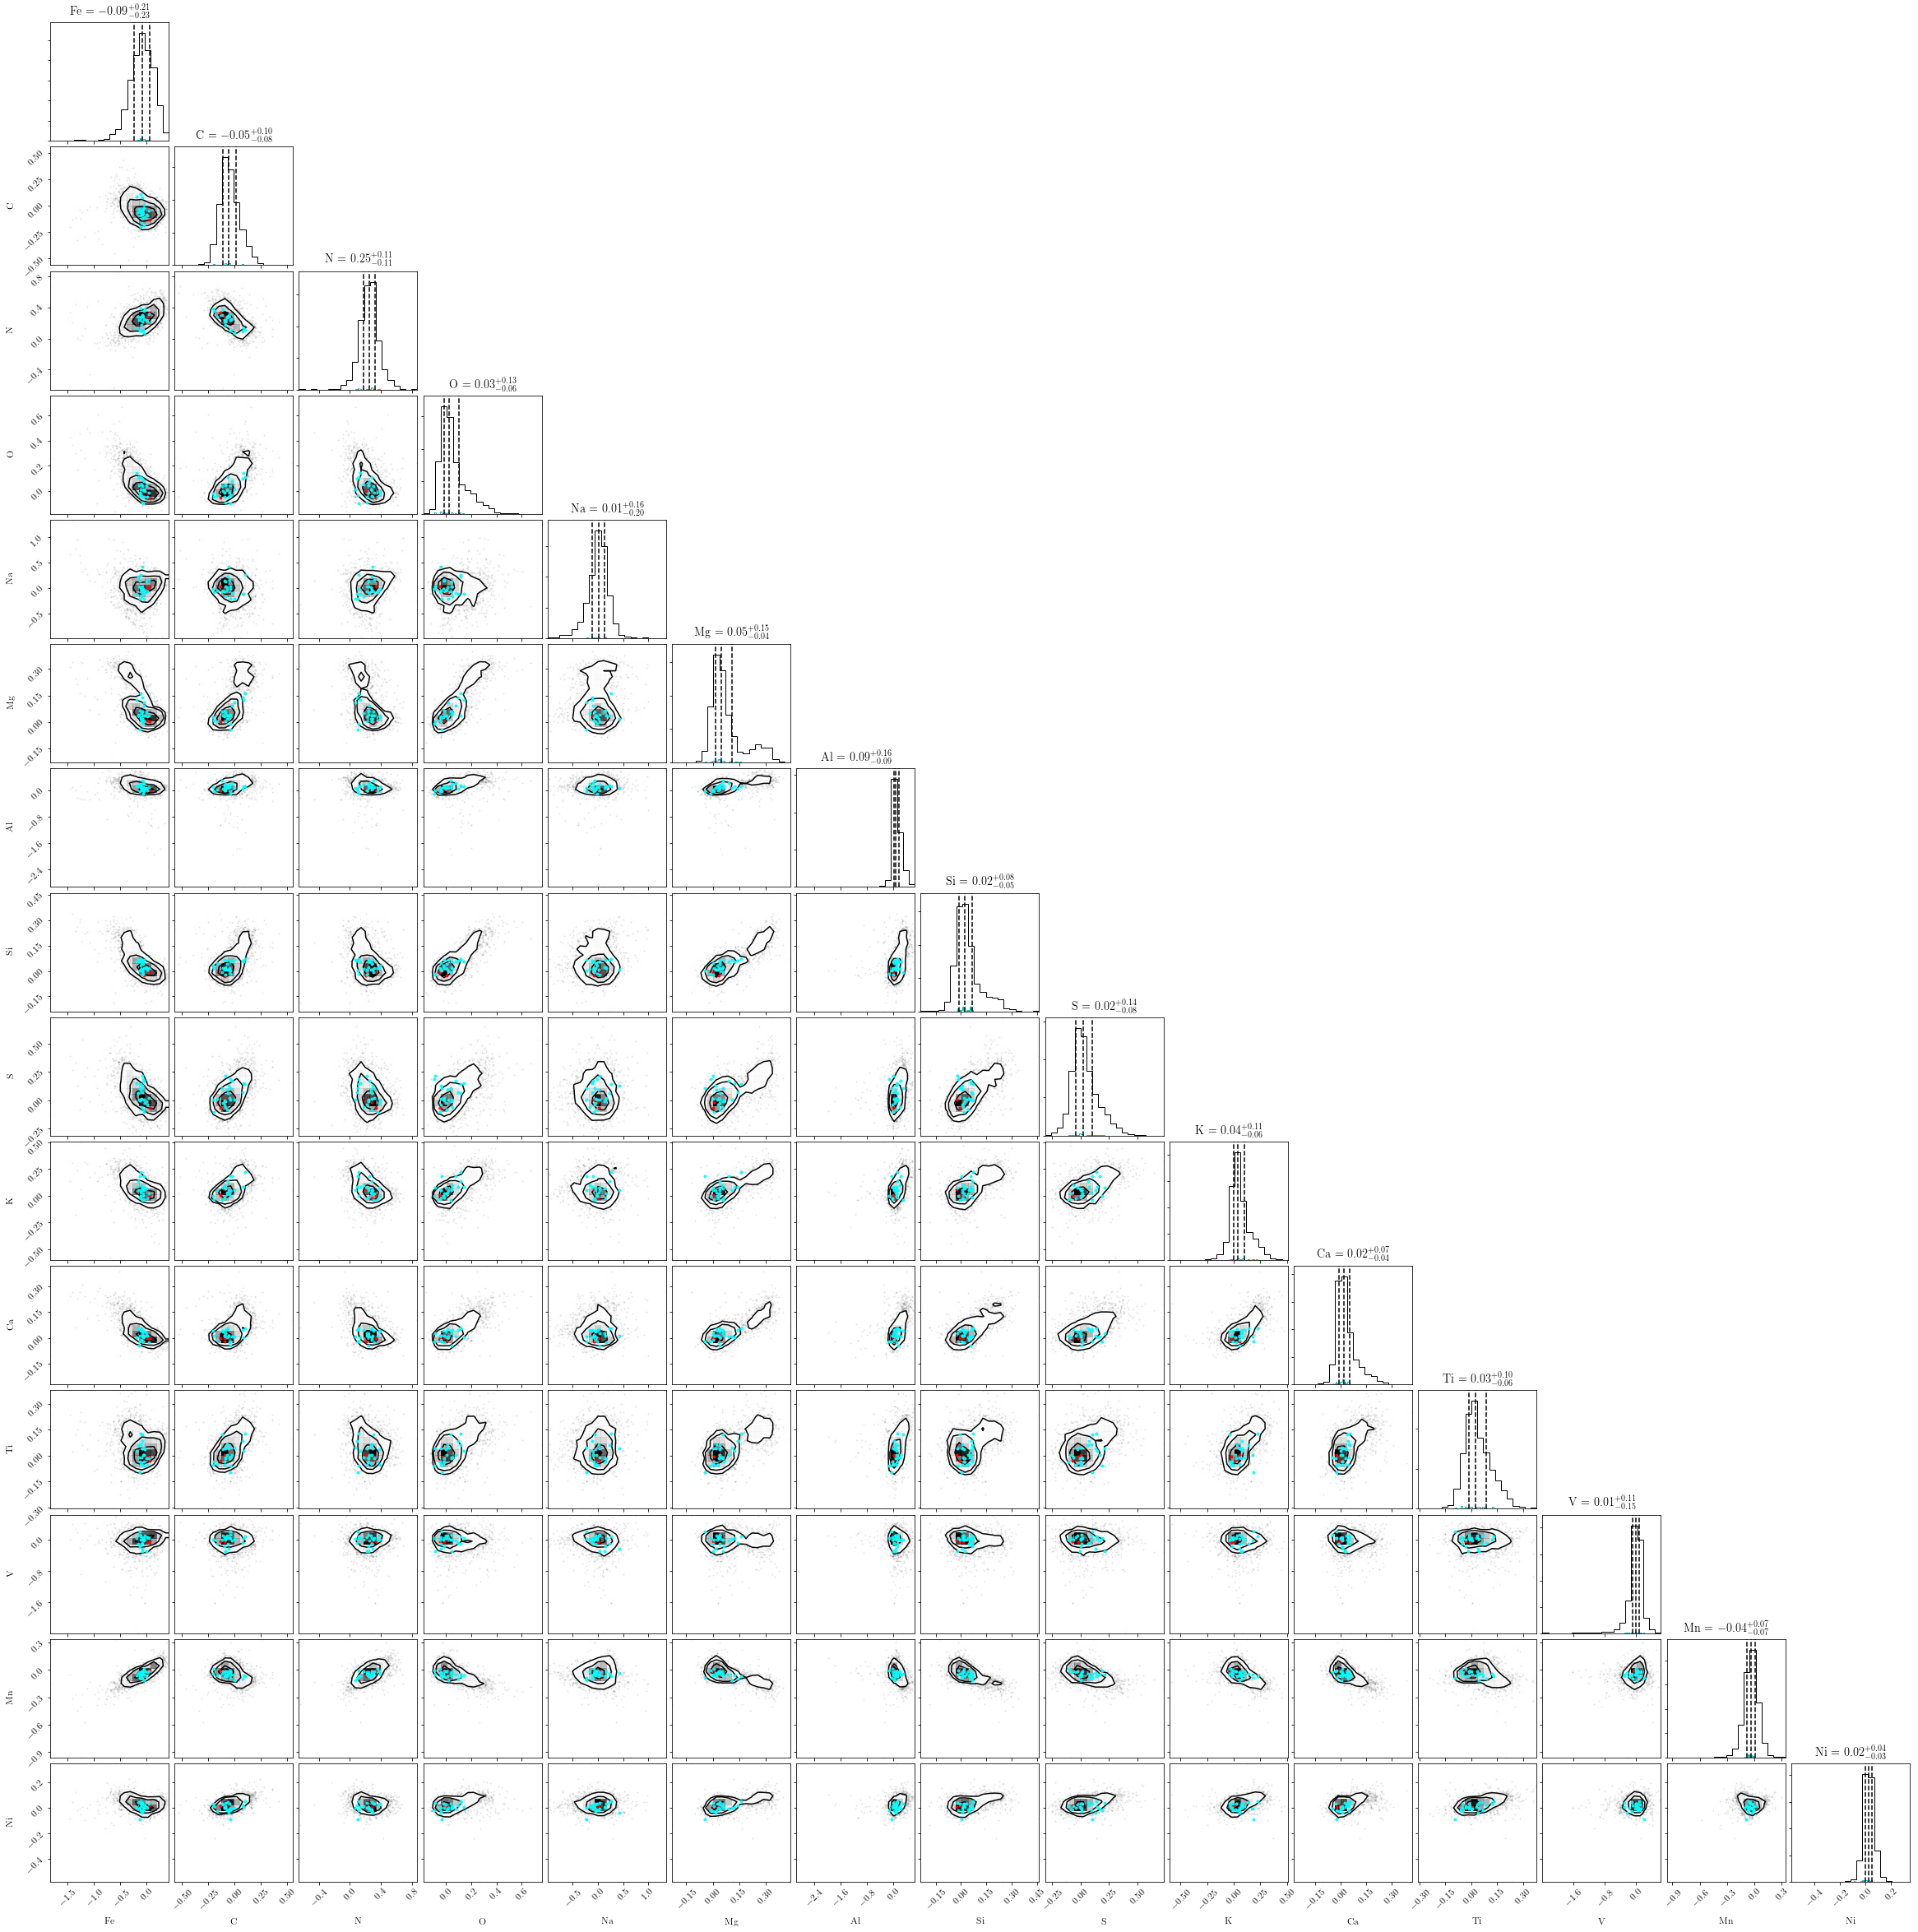

In [180]:
import corner
ndim = 15
ecut = 0.8
ccut = 0.8
sizemin = 10
nbins = 20
mask = d.tsize>sizemin
d.read_run_data(eps=0.1,min_sample=2,update=True,datatype='prin30')
success=(d.eff>=ecut)*(d.com>=ccut)*(d.fsize>sizemin)
fail = (d.eff<ecut)*(d.com<ccut)*(d.fsize>sizemin)
labs = d.matchtlabs[success]
nolabs = d.matchtlabs[fail]
fig = corner.corner(fecenters,labels = np.insert(els,0,'Fe'),quantiles=[0.25,0.5,0.75],show_titles=True,bins=nbins,hist_kwarg={'normed':True,'stacked':True,'bins':nbins})

# Extract the axes
axes = np.array(fig.axes).reshape((ndim, ndim))

# Loop over the histograms
for yi in range(ndim):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.plot(fecenters[nolabs][:,xi], fecenters[nolabs][:,yi], '.',color='red',alpha=0.9)
        ax.plot(fecenters[labs][:,xi], fecenters[labs][:,yi], '.',color='cyan',alpha=0.9)
plt.savefig('master_corner.pdf')
plt.figure()

spectra
abundances
reduced abundances
tophat windows
windows
10 principal components
02 principal components
05 principal components
20 principal components
30 principal components
50 principal components
ting abundances
reduced ting abundances
leung abundances
reduced leung abundances


AttributeError: 'AxesSubplot' object has no attribute 'colorbar'

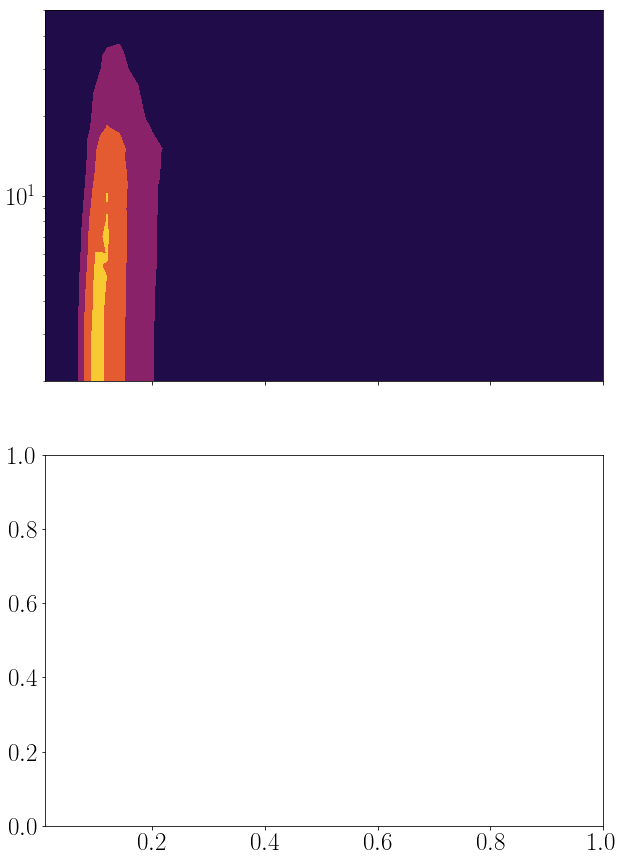

In [62]:
d = read_results(datatype = 'spec', case = 12, 
                 timestamp = '2018-08-21.13.25.56.850111')
d.read_base_data()
if not d.allbad:
    d.generate_average_stats(testnum=10,testsize=15,testeff=0.8,testcom=0.8,iters=100,minmem=15)
    
bins = 25
cmap = 'inferno'
key = 'tabn'
if '{0}_statsource'.format(key) in dir(d):
    ss = getattr(d,'{0}_statsource'.format(key))
    ss = ss.data
    if any(ss['numc'] > 0.5):
        params = ss['params']
        eps = np.array([float(i.split(', ')[0]) for i in params])
        mins = np.array([int(i.split(', ')[1]) for i in params])
        mask = ss['numc'] < 0.5
        ss['numc'][mask] = 0
        ss['fstd'][:,1][mask] = 0
        numclevels = np.linspace(0,np.max(ss['numc'])+(np.max(ss['numc'])/bins),bins)
        levels = np.linspace(0.0,1.01,bins+1)
        fig, (ax1, ax2) = plt.subplots(2, 1, sharex='col',figsize=(10,15))
        ax1.set_yscale('log')
        ax1.set_xscale('log')
        cb=ax1.tricontourf(eps,mins,ss['numc'], bins,levels=numclevels,cmap=cmap)
        fig.colorbar(cb,ax=ax1,label='number of clusters found')
        ax1.set_ylabel(r'$N_{\rm pts}$')
        ax2.set_yscale('log')
        ax2.set_xscale('log')
        cb=ax2.tricontourf(eps,mins,ss['fstd'][:,1], bins,levels=levels,cmap=cmap)
        fig.colorbar(cb,ax=ax2,label='recovery fraction')
        ax2.set_ylabel(r'$N_{\rm pts}$')
        ax2.set_xlabel('f')
        plt.subplots_adjust(hspace=0.035)
        plt.savefig('ex_param_find.pdf')
        
if '{0}_statsource'.format(key) in dir(d):
    ss = getattr(d,'{0}_statsource'.format(key))
    ss = ss.data
    if any(ss['numc'] > 0.5):
        params = ss['params']
        eps = np.array([float(i.split(', ')[0]) for i in params])
        mins = np.array([int(i.split(', ')[1]) for i in params])
        mask = ss['numc'] < 0.5
        ss['numc'][mask] = 0
        ss['fstd'][:,1][mask] = 0
        numclevels = np.linspace(0,np.max(ss['numc'])+(np.max(ss['numc'])/bins),bins)
        levels = np.linspace(0.0,1.01,bins+1)
        fig, (ax1, ax2) = plt.subplots(2, 1, sharex='col',figsize=(10,15))
        ax1.set_yscale('log')
        ax1.set_xscale('log')
        cb=ax1.scatter(eps,mins,c=ss['numc'],cmap=cmap)
        fig.colorbar(cb,ax=ax1,label='number of clusters found')
        ax1.set_ylabel(r'$N_{\rm pts}$')
        ax2.set_yscale('log')
        ax2.set_xscale('log')
        cb=ax2.scatter(eps,mins,c=ss['fstd'][:,1],cmap=cmap)
        fig.colorbar(cb,ax=ax2,label='recovery fraction')
        ax2.set_ylabel(r'$N_{\rm pts}$')
        ax2.set_xlabel('f')
        plt.subplots_adjust(hspace=0.035)
        plt.savefig('ex_param_find.pdf')
        

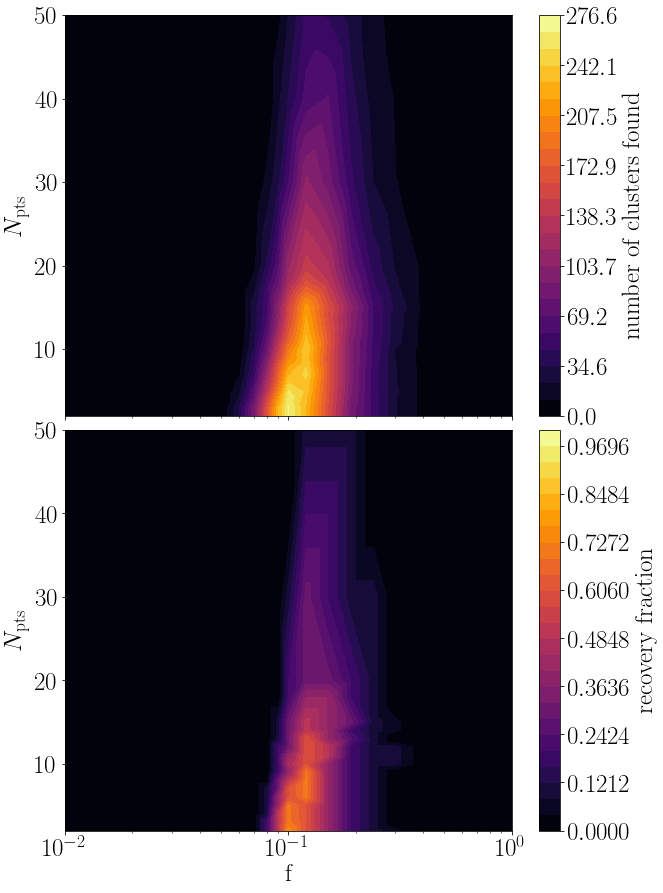

In [81]:
from matplotlib.colors import LogNorm
bins = 25
cmap = 'inferno'
key = 'tabn'
if '{0}_statsource'.format(key) in dir(d):
    ss = getattr(d,'{0}_statsource'.format(key))
    ss = ss.data
    if any(ss['numc'] > 0.5):
        params = ss['params']
        eps = np.array([float(i.split(', ')[0]) for i in params])
        mins = np.array([int(i.split(', ')[1]) for i in params])
        mask = ss['numc'] < 0.5
        ss['numc'][mask] = 0
        ss['fstd'][:,1][mask] = 0
        numclevels = np.linspace(0,np.max(ss['numc'])+(np.max(ss['numc'])/bins),bins)
        levels = np.linspace(0.0,1.01,bins+1)
        fig, (ax1, ax2) = plt.subplots(2, 1, sharex='col',figsize=(10,15))
        #ax1.set_yscale('log')
        ax1.set_xscale('log')
        cb=ax1.tricontourf(eps,mins,ss['numc'], bins,levels=numclevels,cmap=cmap)
        fig.colorbar(cb,ax=ax1,label='number of clusters found')
        ax1.set_ylabel(r'$N_{\rm pts}$')
        #ax2.set_yscale('log')
        ax2.set_xscale('log')
        cb=ax2.tricontourf(eps,mins,ss['fstd'][:,1], bins,levels=levels,cmap=cmap)
        fig.colorbar(cb,ax=ax2,label='recovery fraction')
        ax2.set_ylabel(r'$N_{\rm pts}$')
        ax2.set_xlabel('f')
        plt.subplots_adjust(hspace=0.035)
        plt.savefig('ex_param_find.pdf')

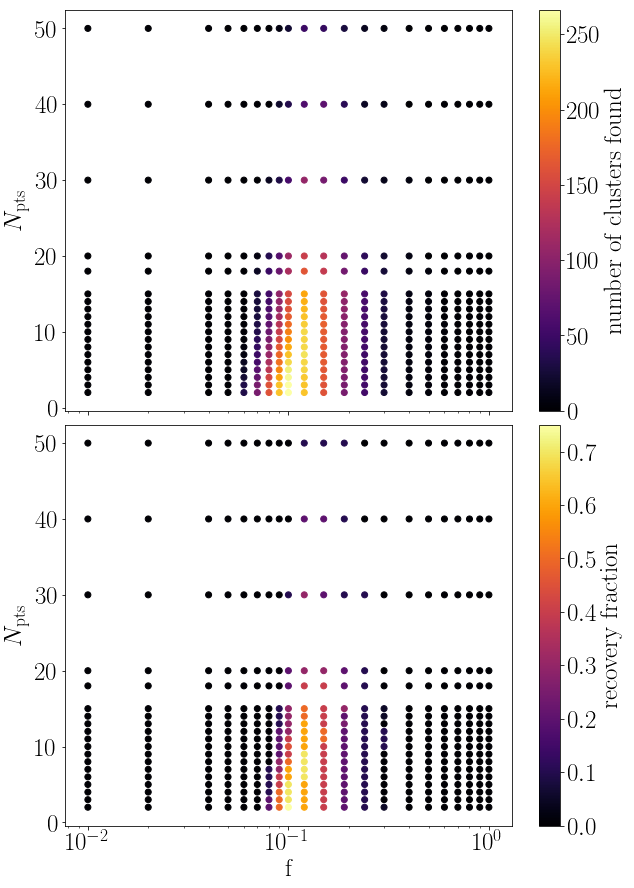

In [82]:
if '{0}_statsource'.format(key) in dir(d):
    ss = getattr(d,'{0}_statsource'.format(key))
    ss = ss.data
    if any(ss['numc'] > 0.5):
        params = ss['params']
        eps = np.array([float(i.split(', ')[0]) for i in params])
        mins = np.array([int(i.split(', ')[1]) for i in params])
        mask = ss['numc'] < 0.5
        ss['numc'][mask] = 0
        ss['fstd'][:,1][mask] = 0
        numclevels = np.linspace(0,np.max(ss['numc'])+(np.max(ss['numc'])/bins),bins)
        levels = np.linspace(0.0,1.01,bins+1)
        fig, (ax1, ax2) = plt.subplots(2, 1, sharex='col',figsize=(10,15))
        #ax1.set_yscale('log')
        ax1.set_xscale('log')
        cb=ax1.scatter(eps,mins,c=ss['numc'],cmap=cmap)
        fig.colorbar(cb,ax=ax1,label='number of clusters found')
        ax1.set_ylabel(r'$N_{\rm pts}$')
        #ax2.set_yscale('log')
        ax2.set_xscale('log')
        cb=ax2.scatter(eps,mins,c=ss['fstd'][:,1],cmap=cmap)
        fig.colorbar(cb,ax=ax2,label='recovery fraction')
        ax2.set_ylabel(r'$N_{\rm pts}$')
        ax2.set_xlabel('f')
        plt.subplots_adjust(hspace=0.035)
        plt.savefig('ex_param_find.pdf')

In [80]:
np.percentile(d.fsize,[25,50,95])

array([ 2. ,  2. , 11.6])